In [7]:
import os
import pandas as pd
import glob

# Set the directory path where your files are located
directory_path = 'C:/Users/solem/Desktop/MLB/'

# Change the working directory to the specified path
os.chdir(directory_path)

# Use a glob pattern to find all CSV files in the directory
csv_files = glob.glob('*.txt')

# Read all CSV files and concatenate them into a single DataFrame
all_data = pd.concat([pd.read_csv(file, sep=',', header=None) for file in csv_files], ignore_index=True)

# Print the first 5 rows of the concatenated DataFrame
print(all_data.head())



        0    1    2    3   4    5    6   7    8   9    ...  151 152  153  154  \
0  18770428    0  Sat  BSN  NL    1  HAR  NL    1   D  ...  NaN NaN  NaN  NaN   
1  18770430    0  Mon  BSN  NL    2  HAR  NL    2   D  ...  NaN NaN  NaN  NaN   
2  18770503    0  Thu  LS1  NL    1  CN1  NL    1   D  ...  NaN NaN  NaN  NaN   
3  18770505    0  Sat  LS1  NL    2  CN1  NL    2   D  ...  NaN NaN  NaN  NaN   
4  18770508    0  Tue  HAR  NL    3  CHN  NL    1   D  ...  NaN NaN  NaN  NaN   

  155  156  157  158  159  160  
0 NaN  NaN  NaN  NaN  NaN  NaN  
1 NaN  NaN  NaN  NaN  NaN  NaN  
2 NaN  NaN  NaN  NaN  NaN  NaN  
3 NaN  NaN  NaN  NaN  NaN  NaN  
4 NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 161 columns]


In [9]:
# Add column names based on data description
column_names = [
    'Date', 'Game_Number', 'Day_of_Week', 'Visiting_Team', 'Visiting_Team_League',
    'Visiting_Team_Game_Number', 'Home_Team', 'Home_Team_League',
    'Home_Team_Game_Number', 'Day_Night', 'Postponement_Cancellation_Indicator',
    'Date_of_Makeup'
]

# Only consider the first 12 columns
all_data = all_data.iloc[:, :12]

all_data.columns = column_names

# Remove unnecessary columns
all_data = all_data.drop(columns=['Game_Number', 'Visiting_Team_Game_Number', 'Home_Team_Game_Number', 'Day_Night', 'Postponement_Cancellation_Indicator', 'Date_of_Makeup'])

# Convert date column to datetime object
all_data['Date'] = pd.to_datetime(all_data['Date'], format='%Y%m%d')

# Print the first 5 rows of the preprocessed DataFrame
print(all_data.head())



        Date Day_of_Week Visiting_Team Visiting_Team_League Home_Team  \
0 1877-04-28         Sat           BSN                   NL       HAR   
1 1877-04-30         Mon           BSN                   NL       HAR   
2 1877-05-03         Thu           LS1                   NL       CN1   
3 1877-05-05         Sat           LS1                   NL       CN1   
4 1877-05-08         Tue           HAR                   NL       CHN   

  Home_Team_League  
0               NL  
1               NL  
2               NL  
3               NL  
4               NL  


Summary statistics:
                       Date Day_of_Week Visiting_Team Visiting_Team_League  \
count                459719      459719        459719               458633   
unique                27279           7           152                    7   
top     1884-05-30 00:00:00         Sat           CHN                   NL   
freq                     52       76089         22080               235334   
first   1871-05-04 00:00:00         NaN           NaN                  NaN   
last    2023-10-01 00:00:00         NaN           NaN                  NaN   

       Home_Team Home_Team_League  
count     459719           458633  
unique       152                7  
top          CHN               NL  
freq       22250           235348  
first        NaN              NaN  
last         NaN              NaN  


<ipython-input-11-ea6d09984c0e>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(all_data.describe(include='all'))


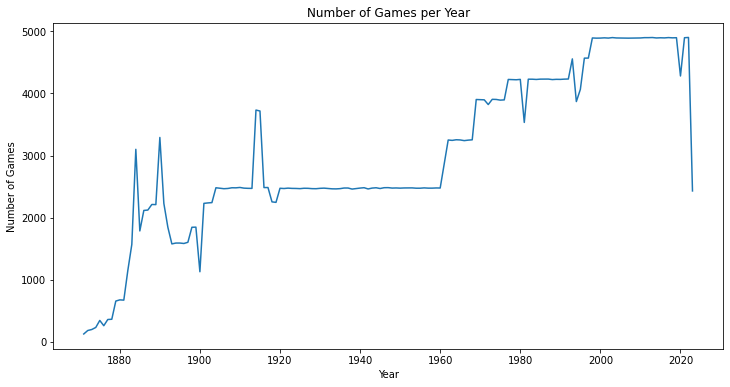

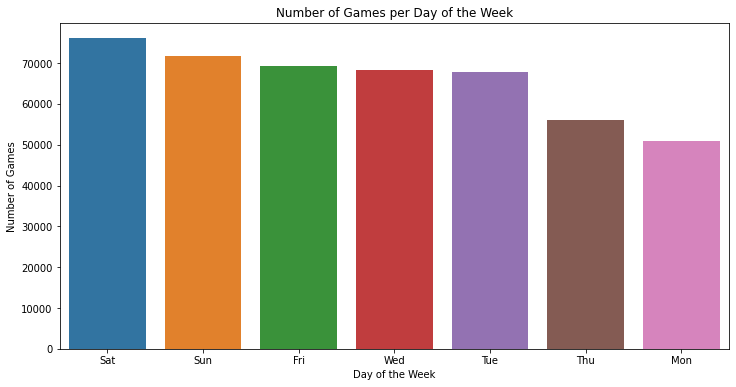

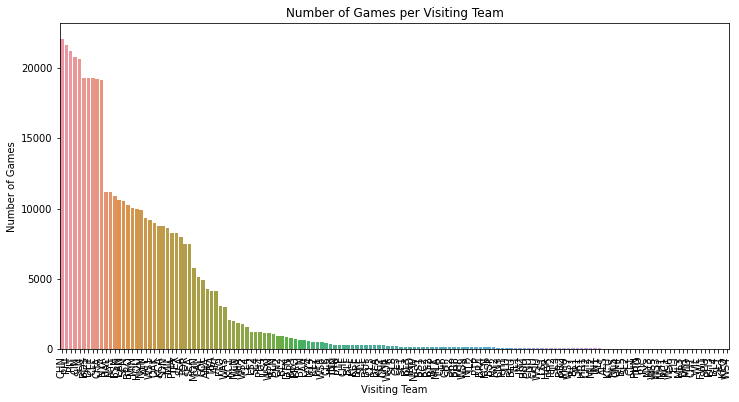

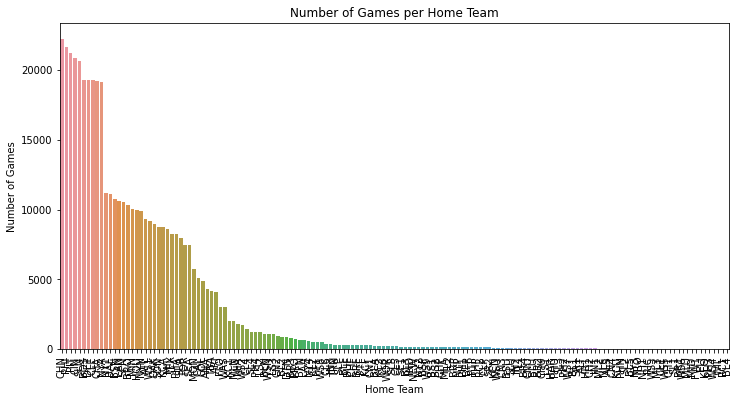

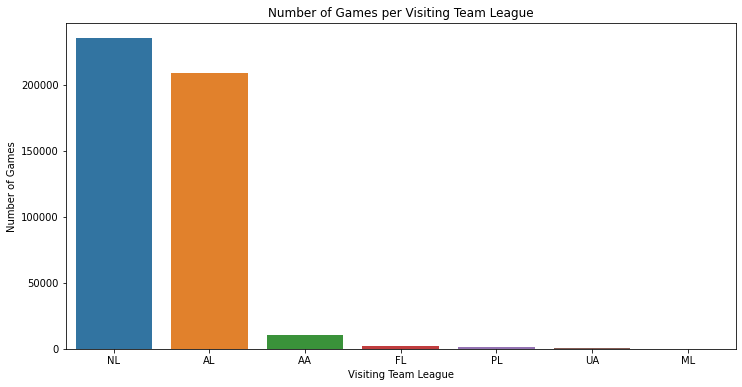

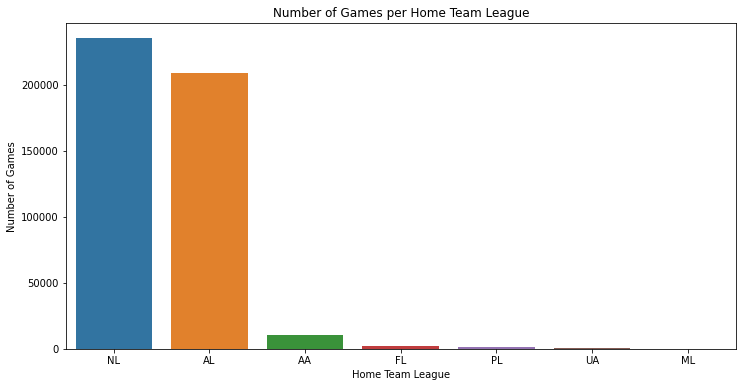

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("Summary statistics:")
print(all_data.describe(include='all'))

# Number of games per year
games_per_year = all_data.groupby(all_data['Date'].dt.year).size()
plt.figure(figsize=(12, 6))
sns.lineplot(x=games_per_year.index, y=games_per_year.values)
plt.title("Number of Games per Year")
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.show()

# Number of games per day of the week
games_per_day_of_week = all_data['Day_of_Week'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=games_per_day_of_week.index, y=games_per_day_of_week.values)
plt.title("Number of Games per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Games")
plt.show()

# Number of games per visiting team
games_per_visiting_team = all_data['Visiting_Team'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=games_per_visiting_team.index, y=games_per_visiting_team.values)
plt.title("Number of Games per Visiting Team")
plt.xlabel("Visiting Team")
plt.xticks(rotation=90)
plt.ylabel("Number of Games")
plt.show()

# Number of games per home team
games_per_home_team = all_data['Home_Team'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=games_per_home_team.index, y=games_per_home_team.values)
plt.title("Number of Games per Home Team")
plt.xlabel("Home Team")
plt.xticks(rotation=90)
plt.ylabel("Number of Games")
plt.show()

# Number of games per visiting team league
games_per_visiting_team_league = all_data['Visiting_Team_League'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=games_per_visiting_team_league.index, y=games_per_visiting_team_league.values)
plt.title("Number of Games per Visiting Team League")
plt.xlabel("Visiting Team League")
plt.ylabel("Number of Games")
plt.show()

# Number of games per home team league
games_per_home_team_league = all_data['Home_Team_League'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=games_per_home_team_league.index, y=games_per_home_team_league.values)
plt.title("Number of Games per Home Team League")
plt.xlabel("Home Team League")
plt.ylabel("Number of Games")
plt.show()
